<a href="https://colab.research.google.com/github/joepareti54/joepareti54/blob/main/gnn_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Looking in links: https://download.pytorch.org/whl/cu111/torch_stable.html
ERROR: Could not find a version that satisfies the requirement torch==1.10.0+cu111 (from versions: 1.11.0, 1.12.0, 1.12.1, 1.13.0, 1.13.1, 2.0.0, 2.0.1, 2.1.0, 2.1.1, 2.1.2, 2.2.0, 2.2.1, 2.2.2, 2.3.0)
ERROR: No matching distribution found for torch==1.10.0+cu111
Looking in links: https://data.pyg.org/whl/torch-1.10.0+cu111.html
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 108.0/108.0 kB 1.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for torch-scatter: filename=torch_scatter-2.1.2-cp310-cp310-linux_x86_64.whl size=507268 sha256=9f3c9b8338f73c4c1ebeb1eacf0f1c59e8f4eeb7a50787be9fb03bc9937e6a8a
  Stored in directory: /root/.cache/pip/wheels/92/f1/2b/3b46d54b134259f58c8363568569053248040859b1a145b3ce
Successfully built torch-scatter
Looking in links: https://data.pyg.org/whl/torch-1.10.0+cu111.html
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 210.0/210.0 kB 1.6 MB/s eta 0:00:00
  Pre

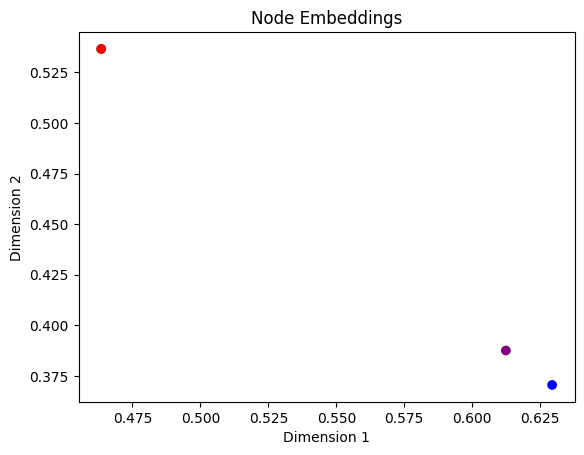

In [ ]:
# Install necessary packages for PyTorch Geometric
!pip install torch==1.10.0+cu111 torchvision==0.11.1+cu111 torchaudio==0.10.0+cu111 torchtext==0.11.0 -f https://download.pytorch.org/whl/cu111/torch_stable.html
!pip install torch-scatter -f https://data.pyg.org/whl/torch-1.10.0+cu111.html
!pip install torch-sparse -f https://data.pyg.org/whl/torch-1.10.0+cu111.html
!pip install torch-cluster -f https://data.pyg.org/whl/torch-1.10.0+cu111.html
!pip install torch-spline-conv -f https://data.pyg.org/whl/torch-1.10.0+cu111.html
!pip install torch-geometric

import torch
import torch.nn as nn
import torch.nn.functional as F
from torch_geometric.data import Data
from torch_geometric.nn import GCNConv
import torch.optim as optim
import matplotlib.pyplot as plt

# Define the Simple GNN model
class SimpleGNN(nn.Module):
    def __init__(self, num_features, output_dim):
        super(SimpleGNN, self).__init__()
        self.conv1 = GCNConv(num_features, 16)
        self.conv2 = GCNConv(16, output_dim)

    def forward(self, data):
        x, edge_index = data.x, data.edge_index
        x = self.conv1(x, edge_index)
        x = F.relu(x)
        x = F.dropout(x, training=self.training)
        x = self.conv2(x, edge_index)
        return F.log_softmax(x, dim=1)

# Define the graph
node_features = torch.tensor([[1], [0], [0], [1]], dtype=torch.float)  # example: 0 = hydrogen, 1 = carbon
edge_index = torch.tensor([
    [0, 1],
    [0, 2],
    [0, 3],
    [1, 0],
    [2, 0],
    [3, 0]
], dtype=torch.long).t().contiguous()

graph = Data(x=node_features, edge_index=edge_index)

# Initialize the model and optimizer
model = SimpleGNN(num_features=1, output_dim=2)
optimizer = optim.Adam(model.parameters(), lr=0.01)
criterion = nn.NLLLoss()

# Training function
def train(data, epochs=100):
    for epoch in range(epochs):
        model.train()
        optimizer.zero_grad()
        out = model(data)
        target = torch.LongTensor([0, 1, 1, 0])  # Dummy labels: e.g., 0 for non-reactive, 1 for reactive
        loss = criterion(out, target)
        loss.backward()
        optimizer.step()
        if epoch % 10 == 0:
            print(f'Epoch {epoch}: Loss = {loss.item()}')

# Train the model
train(graph, epochs=100)

# Function to visualize the embeddings
def plot_embeddings(data):
    model.eval()
    out = model(data).detach().exp()
    plt.scatter(out[:, 0], out[:, 1], c=['blue', 'green', 'red', 'purple'])  # Color by some property
    plt.xlabel('Dimension 1')
    plt.ylabel('Dimension 2')
    plt.title('Node Embeddings')
    plt.show()

# Plot embeddings
plot_embeddings(graph)
